In [1]:
from obspy import UTCDateTime
from obspy.core.event import (Catalog, Comment, Event, EventDescription,
                              Origin, Magnitude, FocalMechanism, MomentTensor,
                              Tensor, SourceTimeFunction)

In [10]:
resourceId = "BSL_synthetic_event"
origin_time = UTCDateTime()
lat,lon = 0.0,0.0
depth = 100.0

Mw = 10.0
m_0 = 1.0

In [26]:
cmt_origin = Origin(
        resource_id=resourceId + "_origin",
        time=origin_time,
        longitude=lon,
        latitude=lat,
        depth=depth,
    )

In [27]:
cmt_mag = Magnitude(
    resource_id=resourceId + "_magnitude",
    # Round to 2 digits.
    mag=round(Mw, 2),
    magnitude_type="mw",
    origin_id=cmt_origin.resource_id
)

In [28]:
foc_mec = FocalMechanism(
    resource_id=resourceId + "_focmec",
    triggering_origin_id=cmt_origin.resource_id
    )

In [29]:
tensor = Tensor(
    m_rr=1.0,
    m_pp=1.0,
    m_tt=1.0,
    m_rt=1.0,
    m_rp=1.0,
    m_tp=1.0
)

In [30]:
mt = MomentTensor(
    resource_id=resourceId + "_moment_tensor",
    derived_origin_id=cmt_origin.resource_id,
    moment_magnitude_id=cmt_mag.resource_id,
    # Convert to Nm.
    scalar_moment = m_0 / 1E7,
    tensor=tensor,
)

In [31]:
# Assemble everything.
foc_mec.moment_tensor = mt

ev = Event(
    resource_id=resourceId + "_event",
    event_type="earthquake"
    )

ev.origins.append(cmt_origin)
ev.magnitudes.append(cmt_mag)
ev.focal_mechanisms.append(foc_mec)

# Set the preferred items.
ev.preferred_origin_id = cmt_origin.resource_id.id
ev.preferred_magnitude_id = cmt_mag.resource_id.id
ev.preferred_focal_mechanism_id = foc_mec.resource_id.id

catalog = Catalog(events=[ev])

In [32]:
ev.write("event.xml", format="QUAKEML")

In [33]:
from obspy.core.event import read_events


In [38]:
ev_cat = read_events("event.xml")

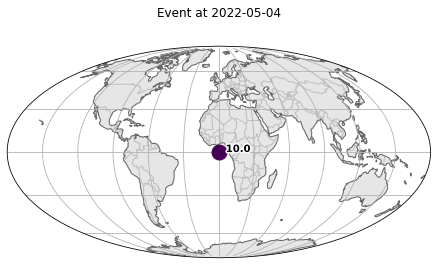

In [39]:
ev_cat.plot();

/home/sylvain/anaconda3/lib/python3.8/site-packages/obspy/imaging/mopad_wrapper.py:58: RuntimeWarning: invalid value encountered in true_divide
  fm /= np.linalg.norm(fm)


LinAlgError: Array must not contain infs or NaNs

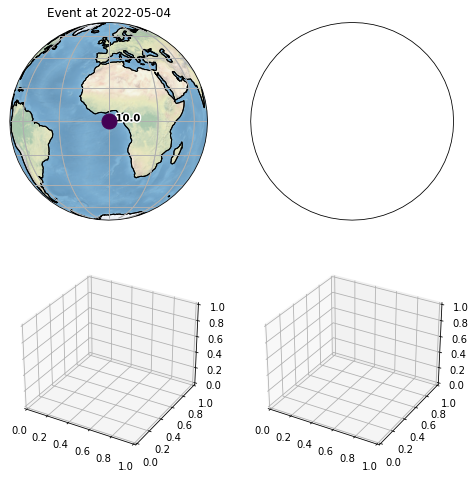

In [40]:
ev_cat[0].plot();